<a href="https://colab.research.google.com/github/hughmck/COMP472-Assignment1/blob/main/472A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comp 472 Assignment 1


# Process
Step 1 : Dataset Preparation & Analysis  
* 1.1 : Preprocessing  
* 1.2 : Extraction and plotting    

Step 2 : Words as Features   

* 2.1 : Size of Vocabulary
* 2.2 : Training ang Testing Splits
* 2.3 : Train and Test Classifiers
* 2.4 : Performance of Classifiers

Step 3 : Embeddings as Features
Step 4 : Analysis

## Step 1.1 : Preprocessing

In [ ]:
# Imports
import pandas as pd
import numpy as np
import json
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [ ]:
uploaded = files.upload()
df = pd.read_json(io.StringIO(uploaded.get('goemotions.json').decode('utf-8')))
#df = pd.read_json("goemotions.json")
df.columns = ['text','emotion','sentiment']
emotion = df['emotion']
sentiment = df['sentiment']
text = df['text']
size = df.shape[0]
df.head()

### Step 1.2 : Extraction and plotting

In [ ]:
# Distributions of sentiments
positive = df.loc[sentiment == 'positive']
neutral = df.loc[sentiment == 'neutral']
ambiguous = df.loc[sentiment == 'ambiguous']
negative = df.loc[sentiment == 'negative']

# percentage of each sentiment
p = (positive.shape[0])/size
n = (neutral.shape[0])/size
neg = (negative.shape[0])/size
a = (ambiguous.shape[0])/size

# printing the number of posts in each sentiment category
print(f'positive count: {positive.shape[0]}') 
print(f'neutral count: {neutral.shape[0]}')
print(f'ambiguous count: {ambiguous.shape[0]}')
print(f'negative count: {negative.shape[0]}')


#Distributions of emotions
emotions_lst = df['emotion'].value_counts().to_dict()
emotions_lst


positive count: 58968
neutral count: 55298
ambiguous count: 19009
negative count: 38545


{'neutral': 55298,
 'approval': 11259,
 'admiration': 10531,
 'annoyance': 8342,
 'disapproval': 7686,
 'gratitude': 7075,
 'amusement': 6130,
 'curiosity': 5885,
 'anger': 5202,
 'love': 4957,
 'confusion': 4938,
 'realization': 4714,
 'disappointment': 4706,
 'optimism': 4519,
 'joy': 4329,
 'sadness': 3827,
 'caring': 3523,
 'surprise': 3472,
 'excitement': 3020,
 'disgust': 2914,
 'desire': 2147,
 'fear': 1778,
 'remorse': 1510,
 'embarrassment': 1433,
 'nervousness': 796,
 'relief': 788,
 'pride': 690,
 'grief': 351}

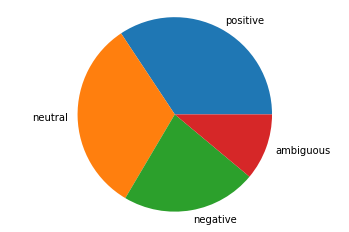

In [ ]:
# Sentiment Pie Chart
sentimentChart = np.array([p,n,neg,a]) # setting the sentiment pie chart
sentimentChartLabels = ["positive", "neutral", "negative", "ambiguous"]

plt.pie(sentimentChart, labels = sentimentChartLabels)
plt.axis('equal')
plt.savefig('sentiment_piechart.png', dpi = 300)
plt.show()

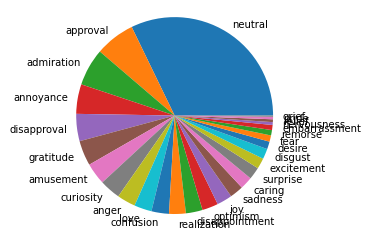

In [ ]:
# Emotions Pie Chart
labels = []
sizes = []

for x, y in emotions_lst.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.savefig('emotions_piechart.png', dpi = 300)
plt.show()

## Step 2.1 : Size of Vocabulary  


In [ ]:
# Size of vocabulary
cv = CountVectorizer(stop_words='english', decode_error='ignore')   
X = cv.fit_transform(text)
vocab_size = cv.get_feature_names_out().shape[0]
print(f'Size of vocabulary is : {vocab_size}')

Size of vocabulary is : 30148


## Step 2.2 : Training and Testing Splits

In [ ]:
#ASK training and testing for each emotion and sentiment or together
# ie. what are the X cols and what are the y cols

# X,y = df[],df[]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X = cv.fit_transform(df.text)
#I'm sure there is a faster way to do for both, by my method is just creating 2 objects for both
#for emotion classification 
X_train, X_test, y_train, y_test = train_test_split(X, df.emotion, test_size=0.2)

#for sentiment classification 
A_train, A_test, B_train, B_test = train_test_split(X, df.sentiment, test_size=0.2)


## Step 2.3 : Train and Test Classifiers with a 80-20 Train-test split


In [ ]:
# 2.3.1 Multinomial Naive Bayes Classifier with default parameters

#for emotions
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_predict = MNB.predict(X_test)

#for sentiments
MNB1 = MultinomialNB()
MNB1.fit(A_train,B_train)
sent_predict = MNB1.predict(A_test)

print('\n\n\t\t-------------- 2.3.1 Multinomial Naive Bayes Classifier with Default Parameter-------------\n\n')

print(" Confusion Matrix for the Emotions: \n" + str(metrics.confusion_matrix(y_test, y_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, y_predict)))


print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, sent_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, sent_predict)))






		-------------- 2.3.1 Multinomial Naive Bayes Classifier with Default Parameter-------------


 Confusion Matrix for the Emotions: 
[[ 879   16    1   10   41    2    1    6    0    2    5    1    0    4
     1   54    0   15   42    0  965   12    0    1    0    0    1    9]
 [  49  379    1   19    7    1    0    0    0    2    6    0    1    3
     1    8    0    9    8    0  719    1    0    3    0    0    0    4]
 [  12   13  140   51   10    1    2    4    0    5   21    7    0    2
     1    6    0    1    1    0  741    0    0    2    0    1    4    3]
 [  35   23   61  120   33    2    8    5    1   11   41    9    1    4
     2    9    0    3    0    1 1323    5    0   11    0    0    8    6]
 [  81   18    7   24  205    6    3   12    3    2   19    3    0    0
     3   22    0    8   26    0 1796   21    0   11    0    0    6    5]
 [  14    3    3    3   13   39    1    0    1    2    8    0    1    1
     2   11    0    7    8    0  591   22    0    2    0    2    6  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 Classification Report for the emotions : 
                precision    recall  f1-score   support

    admiration       0.47      0.43      0.45      2068
     amusement       0.50      0.31      0.38      1221
         anger       0.33      0.14      0.19      1028
     annoyance       0.21      0.07      0.10      1722
      approval       0.26      0.09      0.13      2281
        caring       0.31      0.05      0.09       742
     confusion       0.34      0.06      0.10       980
     curiosity       0.40      0.09      0.15      1190
        desire       0.34      0.04      0.07       387
disappointment       0.26      0.04      0.07       978
   disapproval       0.20      0.05      0.09      1557
       disgust       0.36      0.08      0.13       582
 embarrassment       0.44      0.03      0.05       290
    excitement       0.25      0.04      0.07       610
          fear       0.35      0.06      0.10       360
     gratitude       0.76      0.68      0.72      1463
  

In [ ]:
# 2.3.2 Decision Tree with default parameters

#for emotions
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dec_predict = clf.predict(X_test)

#for sentiments
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(A_train,B_train)
dec1_predict = clf1.predict(A_test)


print('\n\n\t\t--- 2.3.2 Decision Tree CLASSIFIER with default parameters---\n\n')

print(" Confusion Matrix for the Emotions: \n" + str(metrics.confusion_matrix(y_test,dec_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, dec_predict)))


print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, dec1_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, dec1_predict)))





		---Decision Tree CLASSIFIER with default parameters---


 Confusion Matrix for the Emotions: 
[[1153   41   16   39  119   17    7   16    8   12   20    4    4   45
     7   69    1   53   79    3  267   30   11   13    5    1    4   24]
 [  60  730   14   39   42   12   16   11    6   12   17    9    3   13
     5   10    0   50   12    0  162    6    2    9    1    1    3    9]
 [  25   20  366  134   30    6   20   13    5   30   43   41   10    5
     7    2    2    6    4    2  231    4    1    9    1    5    3    6]
 [  50   68  214  370  103   32   51   45   14   58   94   47   22   10
    10   11    3   10    7    4  376   10    2   11    0    4   17    7]
 [ 233   67   47  158  560   65   45   27   18   48   67   16    7   31
    13   14    1   28   29   11  700   26    4   34    4    3   11    8]
 [  35   15   20   36   66  186   10    7   12   20   10    2    2    5
     5   12    1   12   13    3  152   24    1    8    2    9   14    1]
 [  23   19   28   71   55   10 

In [ ]:
# 2.3.3 Multi-Layered Perceptron with default parameters 


# I have been running this for 6 hours now and it still hasn't converged. Either the code is wrong or it just takes a long time.
# I have  just a regular laptop, if you guys have a stronger pc, please try and run and let me know. 
#Update: So it ran for about 9 hours total, and the output basically said that it ran for the default of 200 epochs and it still didn't converge, so now I've set max iterations to only 10 

#for emotions
MLP = MLPClassifier(max_iter=10)
MLP.fit(X_train, y_train)
mlp_predict = MLP.predict(X_test)

#for sentiments
MLP1 = MLPClassifier(max_iter=10)
MLP1.fit(A_train, B_train)
mlp1_predict = MLP1.predict(A_test)



print('\n\n\t\t--- 2.3.3 Multi Layered Perceptron CLASSIFIER with default parameters ---\n\n')

print(" Confusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,mlp_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, mlp_predict)))


print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, mlp1_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, mlp1_predict)))

In [ ]:
# 2.3.4 Better performing Multinomial Naive Bayes Classifier using GridSearch


param_grid = {
             "alpha": [10, 5, 0.5, 0] # Got an error when using 0.5 and 0, so moved them to over 1, not sure what to do 
             }

#for emotions
grid_search = GridSearchCV(MNB, param_grid)
grid_search = grid_search.fit(X_train, y_train)
grid_predict = grid_search.predict(X_test)

#for sentiments
grid_search1 = GridSearchCV(MNB1, param_grid)
grid_search1 = grid_search1.fit(A_train, B_train)
grid_predict1 = grid_search1.predict(A_test)


print('\n\n\t\t---- 2.3.4 MNB with GridSearch--------\nHyper parameters: alpha = [300, 20, 0.5, 0]\n ')


print(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,grid_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, grid_predict)))
print('\nGrid best parameters: ' + str(grid_search.best_estimator_))
print('\nGrid best score: ' + str(grid_search.best_score_))



print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, grid_predict1)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, grid_predict1)))
print('\nGrid best parameters: ' + str(grid_search1.best_estimator_))
print('\nGrid best score: ' + str(grid_search1.best_score_))








		---- MNB with GridSearch--------
Hyper parameters: alpha = [300, 20, 5, 140]
 
 
Confusion Matrix for the Emotions: 
[[  401     3     0     1     2     0     0     0     0     0     0     0
      0     0     0    11     0     1    15     0  1633     1     0     0
      0     0     0     0]
 [   13    84     0     0     0     0     0     0     0     0     0     0
      0     0     0     2     0     1     4     0  1150     0     0     0
      0     0     0     0]
 [    4     0    15     2     0     0     1     0     0     0     0     1
      0     0     0     2     0     0     0     0  1005     0     0     0
      0     1     0     0]
 [    7     6     6     6     0     0     0     1     0     0     2     0
      0     0     0     4     0     0     1     0  1616     0     0     0
      0     0     1     0]
 [   31     2     0     0    39     0     0     0     0     0     1     0
      0     0     0     3     0     0     2     0  2197     0     0     0
      0     0     0     0]
 [  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 Classification Report for the emotions : 
                precision    recall  f1-score   support

    admiration       0.60      0.19      0.29      2068
     amusement       0.62      0.07      0.12      1254
         anger       0.43      0.01      0.03      1031
     annoyance       0.23      0.00      0.01      1650
      approval       0.46      0.02      0.03      2275
        caring       0.33      0.00      0.01       683
     confusion       0.25      0.00      0.00       988
     curiosity       0.64      0.01      0.01      1203
        desire       1.00      0.00      0.01       436
disappointment       0.25      0.00      0.00       940
   disapproval       0.40      0.00      0.01      1560
       disgust       0.67      0.02      0.04       578
 embarrassment       0.00      0.00      0.00       277
    excitement       0.57      0.01      0.01       644
          fear       0.75      0.01      0.02       362
     gratitude       0.88      0.45      0.59      1370
  

In [ ]:
# 2.3.5 Better performing Decision Tree using GridSearch


tree_para = {'criterion':['gini', 'entropy'],
            'max_depth':[28, 56],               
            'min_samples_split':[137455,120,50],    
         }


tree_para1 = {
            'criterion':['gini', 'entropy'],
           'max_depth':[4, 8], #i'll try 4 and 8
           'min_samples_split':[137455,120,50], #(training sample - 1)
          } 


#FOR EMOTIONS
dt_top = GridSearchCV(DecisionTreeClassifier(),tree_para,cv=10)
dt_top.fit(X_train, y_train)
dt_predict = dt_top.predict(X_test)

#FOR SENTIMENTS
dt_top1 = GridSearchCV(DecisionTreeClassifier(),tree_para1,cv=10)
dt_top1.fit(A_train, B_train)
dt_predict1 = dt_top1.predict(A_test)


print('\n\n\t\t---- 2.3.5 DECISION TREE with GridSearch--------\nHyper parameters: criterion : [gini, entropy]\n max_depth = [3,10] \n min_samples_split = [10, 20, 50]\n ')


print(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,dt_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, dt_predict)))
print('\nGrid best parameters: ' + str(dt_top.best_estimator_))
print('\nGrid best score: ' + str(dt_top.best_score_))


print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, dt_predict1)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, dt_predict1)))
print('\nGrid best parameters: ' + str(dt_top1.best_estimator_))
print('\nGrid best score: ' + str(dt_top1.best_score_))


In [ ]:
# 2.3.6 Better performing Multi-Layered Perceptron using GridSearch

MLP = MLPClassifier(max_iter=10)
MLP1 = MLPClassifier(max_iter=10)
parameter_space = {
                  'activation':['logistic','tanh','relu', 'identity'],
                  'hidden_layer_sizes' : [(100,50), (50,40,30)],
                  'solver' :['adam', 'stochastic'],
                  }

#FOR EMOTIONS
mlp_top = GridSearchCV(MLP, parameter_space, cv=10)
mlp_top.fit(X_train, y_train)
mlptop_predict = mlp_top.predict(X_test)

#FOR SENTIMENTS
mlp_top1 = GridSearchCV(MLP1, parameter_space, cv=10)
mlp_top1.fit(A_train, B_train)
mlptop_predict1 = mlp_top1.predict(A_test)



print('\n\n\t\t---- 2.3.6 MutliLayered Perceptron with GridSearch--------\nHyper parameters: activation : [sigmoid, tanh, relu, identity ]\nhidden_layer_sizes = [(100,50), (50,40,30)]\nsolver = [adam, stochastic]')


print(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,mlptop_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, mlptop_predict)))
print('\nGrid best parameters: ' + str(mlp_top.best_estimator_))
print('\nGrid best score: ' + str(mlp_top.best_score_))



print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, mlptop_predict1)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, mlptop_predict1)))
print('\nGrid best parameters: ' + str(mlp_top1.best_estimator_))
print('\nGrid best score: ' + str(mlp_top1.best_score_))



## Step 2.4 : Performance of Classifiers

In [ ]:
#Writing all the outputs from the above 6 classifiers into file performance 

#same code as above, except instrad of printing, we are writing it to file
# not sure if having this all in the same code block is a good idea, might move them into separate blocks as well like above. 

f = open('performance.txt','a') #this is how I wrote to file in pycharm, not sure if it works in jupyter tho 


f.write('\n------These tests were conducted with 80% training and 20% testing split------\n\n')

#2.3.1 Multinomial Naive Bayes Classifiers with default parameters

#for emotions
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_predict = MNB.predict(X_test)



#for sentiments
MNB1 = MultinomialNB()
MNB1.fit(A_train,B_train)
sent_predict = MNB1.predict(A_test)



f.write('\n\n\t\t---MNB CLASSIFIER with default values---\n\n')

f.write(" Confusion Matrix for the Emotions: \n" + str(metrics.confusion_matrix(y_test, y_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, y_predict)))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, sent_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, sent_predict)))






#2.3.2 Decision tree classifier

#for emotions
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dec_predict = clf.predict(X_test)


#for sentiments
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(A_train,B_train)
dec1_predict = clf1.predict(A_test)


f.write('\n\n\t\t---Decision Tree CLASSIFIER---\n\n')

f.write(" Confusion Matrix for the Emotions: \n" + str(metrics.confusion_matrix(y_test,dec_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, dec_predict)))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, dec1_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, dec1_predict)))





#2.3.3 Multi Layered Perceptron

#for emotions
MLP = MLPClassifier(max_iter=10)
MLP.fit(X_train, y_train)
mlp_predict = MLP.predict(X_test)

#for sentiments
MLP1 = MLPClassifier(max_iter=10)
MLP1.fit(A_train, B_train)
mlp1_predict = MLP1.predict(A_test)



f.write('\n\n\t\t---Multi Layered Perceptron CLASSIFIER---\n\n')

f.write(" Confusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,mlp_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, mlp_predict)))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, mlp1_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, mlp1_predict)))






#2.3.4 Multinomial Naive Bayes usign GridSearchCV



param_grid = {
          "alpha": [300, 20, 5, 140] # Get an error when using 0.5 and 0
          }

#for emotions
grid_search = GridSearchCV(MNB, param_grid)
grid_search = grid_search.fit(X_train, y_train)
grid_predict = grid_search.predict(X_test)

#for sentiments
grid_search1 = GridSearchCV(MNB1, param_grid)
grid_search1 = grid_search1.fit(A_train, B_train)
grid_predict1 = grid_search1.predict(A_test)


f.write('\n\n\t\t---- MNB with GridSearch--------\nHyper parameters: alpha = [300,20,5,140]\n ')


f.write(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,grid_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, grid_predict)))
f.write('\nGrid best parameters: ' + str(grid_search.best_estimator_))
f.write('\nGrid best score: ' + str(grid_search.best_score_))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, grid_predict1)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, grid_predict1)))
f.write('\nGrid best parameters: ' + str(grid_search1.best_estimator_))
f.write('\nGrid best score: ' + str(grid_search1.best_score_))








#2.3.5 Top DT


tree_para = {'criterion':['gini', 'entropy'],
            'max_depth':[3, 10],
            'min_samples_split':[10,20,50],
         }


#FOR EMOTIONS
dt_top = GridSearchCV(DecisionTreeClassifier(),tree_para,cv=10)
dt_top.fit(X_train, y_train)
dt_predict = dt_top.predict(X_test)

#FOR SENTIMENTS
dt_top1 = GridSearchCV(DecisionTreeClassifier(),tree_para,cv=10)
dt_top1.fit(A_train, B_train)
dt_predict1 = dt_top1.predict(A_test)


f.write('\n\n\t\t---- DECISION TREE with GridSearch--------\nHyper parameters: criterion : [gini, entropy]\n max_depth = [3,10] \n min_samples_split = [10, 20, 50]\n ')


f.write(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,dt_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, dt_predict)))
f.write('\nGrid best parameters: ' + str(dt_top.best_estimator_))
f.write('\nGrid best score: ' + str(dt_top.best_score_))


f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, dt_predict1)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, dt_predict1)))
f.write('\nGrid best parameters: ' + str(dt_top1.best_estimator_))
f.write('\nGrid best score: ' + str(dt_top1.best_score_))






#2.3.6 Top MPL

parameter_space = {
  'activation':['sigmoid','tanh','relu', 'identity'],
   'hidden_layer_sizes' : [(100,50), (50,40,30)],
    'solver' :['adam', 'stochastic'],
}

#FOR EMOTIONS
mlp_top = GridSearchCV(MLP, parameter_space, cv=10)
mlp_top.fit(X_train, y_train)
mlptop_predict = mlp_top.predict(X_test)

#FOR SENTIMENTS
mlp_top1 = GridSearchCV(MLP1, parameter_space, cv=10)
mlp_top1.fit(A_train, B_train)
mlptop_predict1 = mlp_top1.predict(A_test)



f.write('\n\n\t\t---- MutliLayered Perceptron with GridSearch--------\nHyper parameters: activation : [sigmoid, tanh, relu, identity ]\nhidden_layer_sizes = [(100,50), (50,40,30)]\nsolver = [adam, stochastic]')


f.write(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,mlptop_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, mlptop_predict)))
f.write('\nGrid best parameters: ' + str(mlp_top.best_estimator_))
f.write('\nGrid best score: ' + str(mlp_top.best_score_))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, mlptop_predict1)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, mlptop_predict1)))
f.write('\nGrid best parameters: ' + str(mlp_top1.best_estimator_))
f.write('\nGrid best score: ' + str(mlp_top1.best_score_))




2.5 Run all 6 classifiers again with different Test-Training split 

In [ ]:
#have to insert same code as above, but also include the split part, and change the split to whatever works better. 
#In the demo they might run the code with a smaller dataset, so our split will have to be precise in that regard
# probably not gonna copy the code here, will just change the splits on my end and write to a new file maybe 



3.0

In [ ]:
import gensim.downloader as api
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk import word_tokenize 


# 3.1

In [ ]:
model = api.load("word2vec-google-news-300")  # download the model and return as object ready for use

# 3.2

In [ ]:
counter = 0
redVec = [nltk.word_tokenize(t) for t in df.text]
for sentence in redVec:
    counter += len(sentence)
print(counter)

NameError: ignored

In [ ]:
texts = df['text'].tolist()
tokens = list(map(len, map(nltk.word_tokenize, texts)))
total = sum(tokens)

TypeError: ignored

In [ ]:
[j for i in redVec for j in i]

NameError: ignored

# 3.3 : Embeddings 

In [ ]:
google_embedding = list(model.wv.vocab)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(google_embedding)
X_train_counts.shape 
google = count_vect.vocabulary_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
# transforms given text into frequency (count) of each word that occurs in the entire text
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(texts)
X_train_counts.shape 
reddit = count_vect.vocabulary_

TEST

In [ ]:
from typing import List, Dict, Tuple, Any, Callable
import numpy as np
import pandas as pd
import itertools
import torch
!pip install transformers
from transformers import AutoTokenizer, AutoModel
# Global vars
_verbose = 0
_batch_size = 1

# Helper func 1
def get_word_idx(sent: str, word: str) -> int:
    """split sentences and add index to each word. Each word has its own index based on when it was added to the list first
    Args:
        sent (str): sentence in string
        word (str): word in string
    Returns:
        int: output the index of where the word correspond to in each sentence input
    """
    return sent.lower().split(" ").index(word)


# Helper func 2
def get_hidden_states(sent, tokenizer, model, layers):
    """Push input IDs through model. Stack and sum `layers` (last four by default).
       Select only those subword token outputs that belong to our word of interest
       and average them.
    Args:
        sent (str): Input sentence
        tokenizer : Tokenizer function
        model: bert model
        layers : last 4 model of model
    Returns:
        output: tensor torch
    """
    # encode without adding [CLS] and [SEP] tokens
    encoded = tokenizer.encode_plus(sent, return_tensors="pt", add_special_tokens=False)

    with torch.no_grad():
        output = model(**encoded)

    # Get all hidden states
    states = output.hidden_states
    # Stack and sum all requested layers
    output = torch.stack([states[i] for i in layers]).sum(0).squeeze()
    # Only select the tokens that constitute the requested word
    return output


# Helper func 3
def chunking(max_len, sent):
    """because the embedding function is trained on dim 512, so we have to limit the size of the sentences using max_len so the final chunked sentences wont exceed length 512
    Args:
        max_len (int): maximum number of tokens for each chunk
        sent (str): input sentence
    Returns:
        sent_chunk (List(str)): list of chunked sentences
    """
    tokenized_text = sent.lower().split(" ")
    # using list comprehension
    final = [
        tokenized_text[i * max_len : (i + 1) * max_len]
        for i in range((len(tokenized_text) + max_len - 1) // max_len)
    ]

    # join back to sentences for each of the chunks
    sent_chunk = []
    for item in final:
        # make sure the len(items) > 1 or else some of the embeddings will appear as len 1 instead of 768.
        assert len(item) > 1
        sent_chunk.append(" ".join(item))
    return sent_chunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.1 MB/s 
     |████████████████████████████████| 163 kB 55.7 MB/s 
     |████████████████████████████████| 7.6 MB 61.5 MB/s 


In [ ]:
# core code for finding average word embedding per sentence
def main_avg(sent: str, layers=None, chunk_size=300):
    """Gives the average word embedding per sentence

    Args:
        sent (str): The input sentence

    Returns:
        torch tensor: word embedding per sentence, dim = 768
    """
    # change all standard form numbers to decimal
    np.set_printoptions(formatter={"float_kind": "{:f}".format})

    # Use last four layers by default
    layers = [-4, -3, -2, -1] if layers is None else layers
    global tokenizer
    global model
    

    # chunking
    chunked_tokens = chunking(chunk_size, sent)  # helper func 3

    # initialise a outside chunk
    word_embedding_avg_collective = []
    # for each chunked token, we embed them separately
    for item in chunked_tokens:
        # adding tensors
        word_embedding_torch = get_hidden_states(
            item, tokenizer, model, layers
        )  # helper fun 2

        # convert torch tensor to numpy array
        word_embedding_avg_np = word_embedding_torch.cpu().detach().numpy()
        word_embedding_avg_chunks = np.mean(word_embedding_avg_np, axis=0)
        word_embedding_avg_collective.append(word_embedding_avg_chunks)
    word_embedding_avg = np.mean(word_embedding_avg_collective, axis=0)
    assert len(word_embedding_avg) == 768
    return word_embedding_avg


In [ ]:
tokenizer = redVec

main_avg("Suppose we have a sequence of 978 tokens, we can chunk them into 2 chunks because 978//512 = 1 (we take one chunk more than the floor division). For illustration, we assume that the embedding vector size of each word is 3.")

AttributeError: ignored

# 3.4 

In [ ]:
hits = len(set(google.keys()).intersection(reddit.keys()))
overall = hits/total
overall

0.010045311960662011

# 3.5

In [ ]:
MLP = MLPClassifier(max_iter=10)
MLP.fit(X_train, y_train) # not sure what to put as X and Y values here 
mlp_predict = MLP.predict(X_test)

# 3.6


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (3,2), learning_rate = 0.01, activation ='relu')
mlp.fit(redVec, model) #not sure if this is the proper inputs

In [ ]:
from sklearn.semi_supervised.tests.test_self_training import X_test
pred_mlp = mlp.predict(X_test)